In [15]:
import pandas as pd
import yfinance as yf 
import matplotlib.pyplot as plt

In [3]:
#Se descargan datos de APPLE y se mantienen los datos de cierre ajustados
df = yf.download('AAPL',
                start='2010-01-31',
                end='2023-12-31',
                progress=False)

df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df

,adj_close
Date,
2010-02-01,5.887798
2010-02-02,5.921964
2010-02-03,6.023859
2010-02-04,5.806765
2010-02-05,5.909869
...,...
2023-12-22,193.353287
2023-12-26,192.803986
2023-12-27,192.903839


In [5]:
#Convertir los precios de cierre ajustados a rendimientos simples
df['simple_rtn'] = df.adj_close.pct_change()
df

,adj_close,simple_rtn
Date,,
2010-02-01,5.887798,NaN
2010-02-02,5.921964,0.005803
2010-02-03,6.023859,0.017206
2010-02-04,5.806765,-0.036039
2010-02-05,5.909869,0.017756
...,...,...
2023-12-22,193.353287,-0.005547
2023-12-26,192.803986,-0.002841
2023-12-27,192.903839,0.000518


In [8]:
#Calcular la media movil y desviación estandar
df_rolling = df[['simple_rtn']].rolling(window=21).agg(['mean','std'])
df_rolling.columns = df_rolling.columns.droplevel()
df_rolling

,mean,std
Date,,
2010-02-01,NaN,NaN
2010-02-02,NaN,NaN
2010-02-03,NaN,NaN
2010-02-04,NaN,NaN
2010-02-05,NaN,NaN
...,...,...
2023-12-22,0.000605,0.009012
2023-12-26,0.000804,0.008881
2023-12-27,0.000873,0.008872


In [10]:
#Unir las medias moviles a los datos originales
df_outliers = df.join(df_rolling)
df_outliers

,adj_close,simple_rtn,mean,std
Date,,,,
2010-02-01,5.887798,NaN,NaN,NaN
2010-02-02,5.921964,0.005803,NaN,NaN
2010-02-03,6.023859,0.017206,NaN,NaN
2010-02-04,5.806765,-0.036039,NaN,NaN
2010-02-05,5.909869,0.017756,NaN,NaN
...,...,...,...,...
2023-12-22,193.353287,-0.005547,0.000605,0.009012
2023-12-26,192.803986,-0.002841,0.000804,0.008881
2023-12-27,192.903839,0.000518,0.000873,0.008872


In [12]:
#Definir función para detectar valores atipicos
def identify_outliers(row, n_sigmas=3):
    '''Función para identificar los valores atípicos utilizando la regla 3 sigma.
    la fila debe contener las siguientes columnas/indices: simple_rtn, mean, std.
    '''
    row : pd.Series
    '''Una fila de un pd.DataFrame, sobre la cual se puede aplicar la función.'''
    n_sigmas: int
    '''El numero de desviaciones estandar por encima/por debajo de la media, utilizando para detectar valores atipicos'''
    #return
    #0/1 : int
    '''Un número entero con 1 que indica un valor atípico y 0 en caso contrario'''
    
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else: 
        return 0

In [14]:
#Identificar los valores atipicos y extraer sus valores para su uso posterior
df_outliers['outlier'] = df_outliers.apply(identify_outliers, axis=1)
outliers = df_outliers.loc[df_outliers['outlier']==1, ['simple_rtn']]
outliers

,simple_rtn
Date,
2010-04-21,0.059814
2011-01-03,0.021733
2012-01-25,0.062439
2013-01-24,-0.123558
2014-01-28,-0.079927
2014-04-24,0.081982
2014-09-03,-0.042207
2014-12-01,-0.032456
2016-04-27,-0.062578


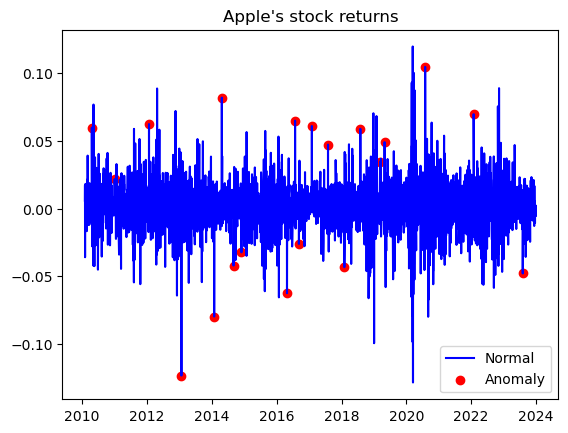

In [16]:
#Graficar los resultados
fig, ax = plt.subplots()
ax.plot(df_outliers.index, df_outliers.simple_rtn, color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, color='red', label='Anomaly')
ax.set_title("Apple's stock returns")
ax.legend(loc='lower right')

#plt.tight_layout()
#plt.savefig('images/ch1_im9.png')
plt.show()